100%|█████████████████████████████████████| 10000/10000 [01:58<00:00, 84.65it/s]


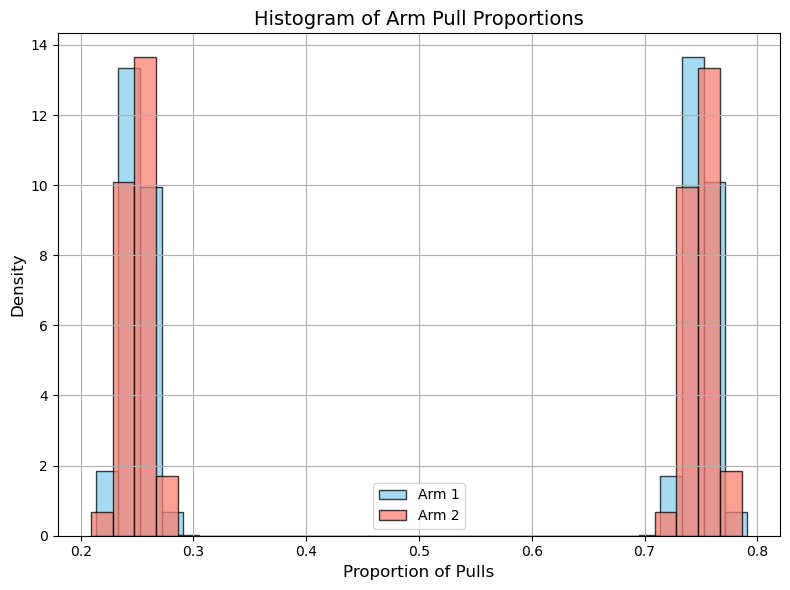

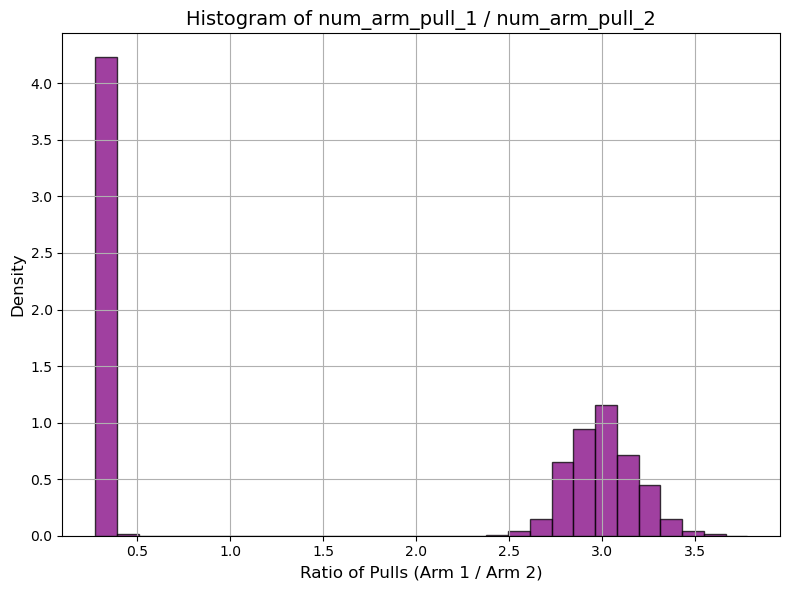

/var/folders/kc/bsxv4hyn11s39gynyl4bzt9c0000gn/T/ipykernel_9619/3265898510.py:79: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.3`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(standardized_errors[:, 0], color='blue', bw=0.3, lw=2, label='KDE Arm 1')


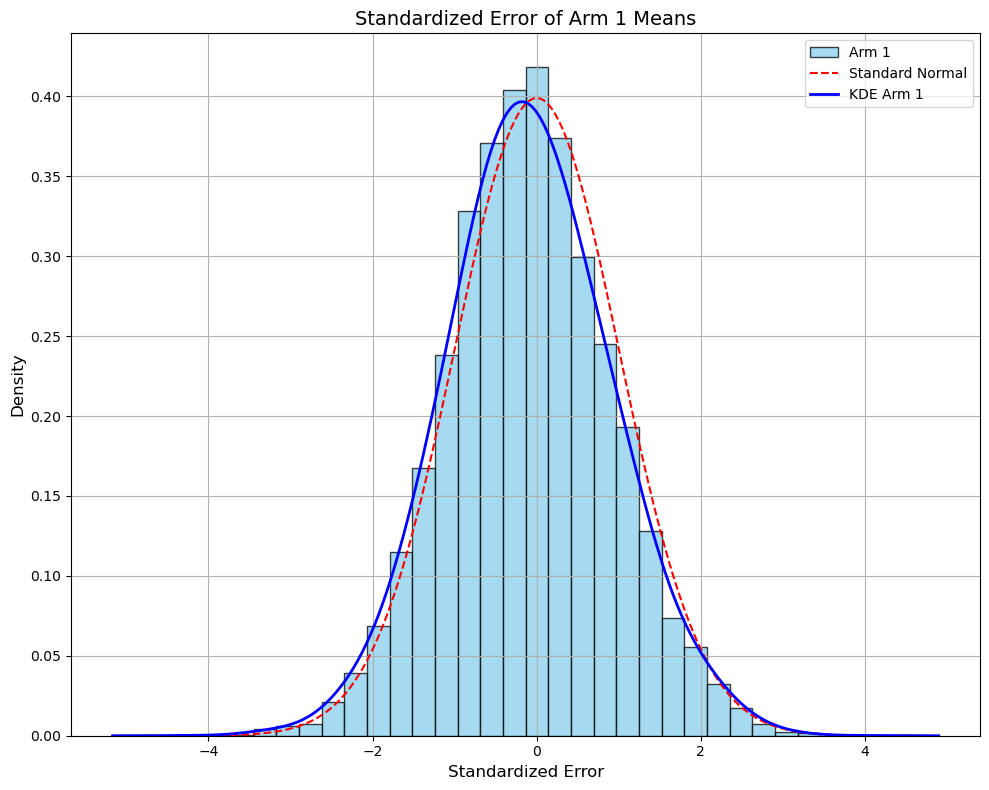

/var/folders/kc/bsxv4hyn11s39gynyl4bzt9c0000gn/T/ipykernel_9619/3265898510.py:94: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.3`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(standardized_errors[:, 1], color='red', lw=2, bw=0.3, label='KDE Arm 2')


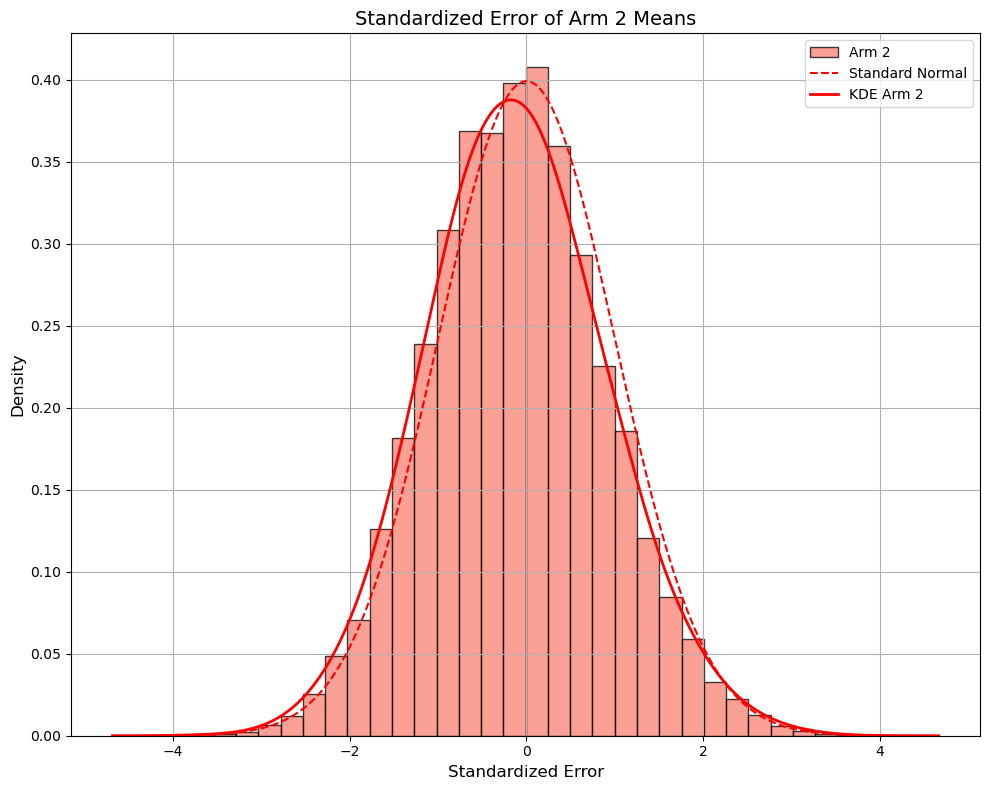

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tqdm import tqdm

# Parameters
T = 1000
num_experiments = 10000
true_means = [0.3, 0.3]  # Example non-zero means for the two arms

# Arrays to store the results
arm_pull_proportions = np.zeros((num_experiments, 2))
arm_pull_ratios = np.zeros(num_experiments)
standardized_errors = np.zeros((num_experiments, 2))

# Run experiments with a progress bar
for exp in tqdm(range(num_experiments)):
    num_pulls = np.zeros(2)
    rewards = np.zeros(2)
    
    # First T/2 rounds
    for t in range(T // 2):
        arm = np.random.choice([0, 1])
        reward = np.random.choice([1, -1]) + true_means[arm]
        rewards[arm] += reward
        num_pulls[arm] += 1
    
    # Calculate means
    mean_rewards = rewards / num_pulls
    arm = np.argmax(mean_rewards)
    
    # Next T/2 rounds
    for t in range(T // 2, T):
        reward = np.random.choice([1, -1]) + true_means[arm]
        rewards[arm] += reward
        num_pulls[arm] += 1
    
    # Calculate final means and standardized errors
    final_means = rewards / num_pulls
    std_errors = 1 / np.sqrt(num_pulls)  # Standard error for each arm
    standardized_errors[exp] = (final_means - true_means) / std_errors
    
    # Store proportions and ratios
    arm_pull_proportions[exp] = num_pulls / T
    arm_pull_ratios[exp] = num_pulls[0] / num_pulls[1] if num_pulls[1] > 0 else 0

# Plotting

# Histogram of arm pull proportions
plt.figure(figsize=(8, 6))
plt.hist(arm_pull_proportions[:, 0], bins=30, alpha=0.75, label='Arm 1', color='skyblue', edgecolor='black', density=True)
plt.hist(arm_pull_proportions[:, 1], bins=30, alpha=0.75, label='Arm 2', color='salmon', edgecolor='black', density=True)
plt.title('Histogram of Arm Pull Proportions', fontsize=14)
plt.xlabel('Proportion of Pulls', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'hist_arm_pull_proportions.pdf'))
plt.show()

# Histogram of num_arm_pull_1 / num_arm_pull_2
plt.figure(figsize=(8, 6))
plt.hist(arm_pull_ratios, bins=30, alpha=0.75, color='purple', edgecolor='black', density=True)
plt.title('Histogram of num_arm_pull_1 / num_arm_pull_2', fontsize=14)
plt.xlabel('Ratio of Pulls (Arm 1 / Arm 2)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'hist_arm_pull_ratios.pdf'))
plt.show()

# Distribution of standardized errors for Arm 1
plt.figure(figsize=(10, 8))
plt.hist(standardized_errors[:, 0], bins=30, density=True, alpha=0.75, color='skyblue', edgecolor='black', label='Arm 1')
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.norm.pdf(x), 'r--', label='Standard Normal')
sns.kdeplot(standardized_errors[:, 0], color='blue', bw=0.3, lw=2, label='KDE Arm 1')
plt.title('Standardized Error of Arm 1 Means', fontsize=14)
plt.xlabel('Standardized Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'dist_standardized_errors_arm1.pdf'))
plt.show()

# Distribution of standardized errors for Arm 2
plt.figure(figsize=(10, 8))
plt.hist(standardized_errors[:, 1], bins=30, density=True, alpha=0.75, color='salmon', edgecolor='black', label='Arm 2')
x = np.linspace(-4, 4, 1000)
plt.plot(x, stats.norm.pdf(x), 'r--', label='Standard Normal')
sns.kdeplot(standardized_errors[:, 1], color='red', lw=2, bw=0.3, label='KDE Arm 2')
plt.title('Standardized Error of Arm 2 Means', fontsize=14)
plt.xlabel('Standardized Error', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'dist_standardized_errors_arm2.pdf'))
plt.show()
